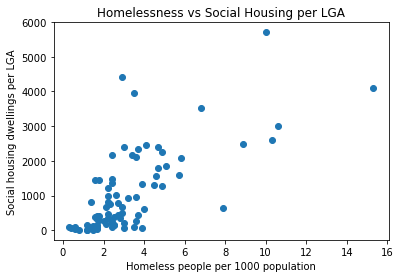

Correlation: 0.693444073673


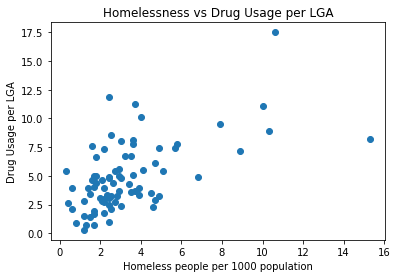

Correlation: 0.587371784884


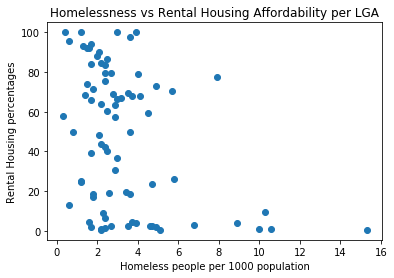

Correlation: -0.373500414779


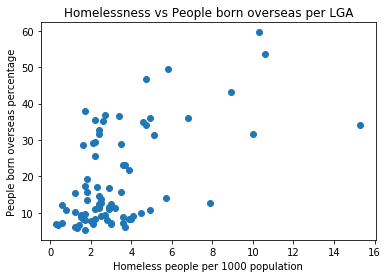

Correlation: 0.564352964286


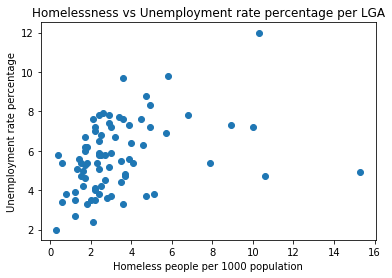

Correlation: 0.356769270112


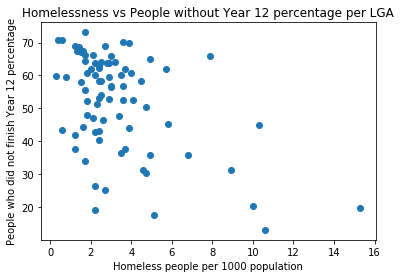

Correlation: -0.489061342963


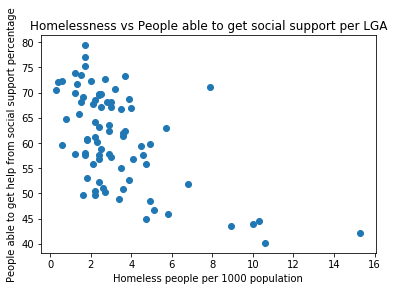

Correlation: -0.578161622315


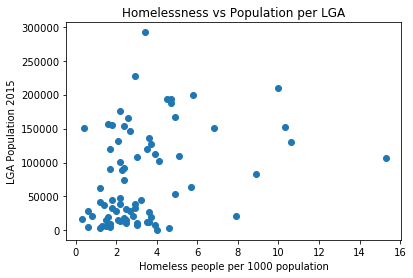

Correlation: 0.333722989292


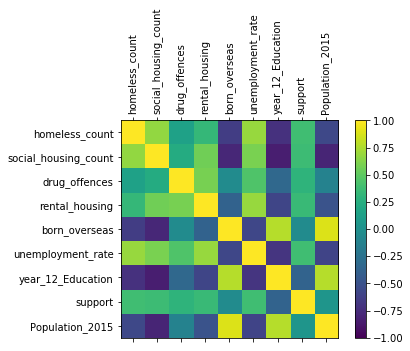

In [3]:
# necessary libraries for this module
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import plotly.plotly as py

# Create new dataframe
def create_dataframe(filename):
    """
    Creates a dataframe from filename specified.
    Also strips any whitespace for columns headers.
    
    Args:
        filename: a string specifying dataset in csv format
    Returns:
        a pandas dataframe corresponding to the dataset provided
    """

    df = pd.read_csv(filename)
    
    # strips whitespace
    df = df.rename(columns = lambda x: x.strip())
    return df

def check_lgas(df1, df2):
    """
    Some preprocessing checking in order to check if both dataframes
    contain same amount of LGAs. 
    
    Args:
        df1: first dataframe corresponding to dataset 1
        df2: second dataframe corresponding to dataset 2
    Returns:
        true if both dataframes match, false if not
    """
    
    # convert lga codes into lists
    l1 = list(df1['lga_code']) 
    l2 = list(df2['lga_code'])

    if len(l1) != len(l2):
        return False

    # check if any values are not common in both dataframes
    if len(list(set(l2) - set(l1))) != 0 or len(list(set(l1) - set(l2))) != 0:
        return False

    return True

def bar_chart_homeless_pop(df):
    """
    A function used in phase 2 to show bar charts of the homeless populations
    
    Args:
        df: the dataframe to be plotted
    Returns:
        bar chart of homeless
    """
    
    data = dict(zip(df['lga_code'], df['homeless_ppl_est_per_1000_pop']))
    plt.bar(range(len(data)), data.values(), width=1/1.5)
    plt.xticks(range(len(data)), data.keys(), rotation=90)
    plt.title('LGA Homeless Population per 1000 Residents')
    plt.xlabel('LGA Codes')
    plt.ylabel('Homeless Population per 1000')
    plt.show()
    return

# scatter plot between two columns
def create_scatter(col1, col2):
    """
    Creates scatter plot of two variables, col1 and col2.
    Args:
        col1: first variable
        col2: second variable
    Returns:
        scatter plot of both variables
    """
    
    # put the columns into lists, easier to work with
    x = [x for x in df1[col1]]
    y = [y for y in df1[col2]]

    plt.scatter(x, y)

    plt.show()

    return


def calculate_pearsons_corr(col1, col2):
    """
    Calculates pearsons correlation of two variables.
    Args:
        col1: first variable
        col2: second variable
    Returns:
        returns correlation coefficient
    """
    return df1[col1].corr(df1[col2])

# creating dataframes for datasets
df1 = create_dataframe('dataset1.csv')
df2 = create_dataframe('dataset2.csv')

#reordering columns
new_order_col = ['lga_name', 'lga_code', 'homeless_ppl_est_per_1000_pop', 'social_housing_dwellings', 
                 'drug_usage_and_possession_offences_per_1000_pop', 'rental_housing_that_is_affordable_perc', 
                 'ppl_born_overseas_perc', 'unemployment_rate_perc','ppl_who_did_not_complete_yr_12_perc', 
                 'ppl_who_are_def_able_to_get_help_from_nbrs_perc']

df1 = df1[new_order_col]

#Adding population to first dataframe
df1['Population_2015'] = df2['tpop_2015']

# new column names, since the above are too long and hard to index
new_cols = ['lga_name', 'lga_code', 'homeless_count', 'social_housing_count', 'drug_offences', 'rental_housing',
              'born_overseas', 'unemployment_rate', 'year_12_Education', 'support', 'Population_2015']

# renaming columns. 
df1.columns = new_cols

def scatterplots_to_screen(col1, col2):
    """
    Outputs scatter plot of two varaibles, along with correlations
    
    Args:
        col1: the first variable
        col2: the second variable
    Returns:
        None
    """
    create_scatter(col1, col2)
    print("Correlation: " + str(calculate_pearsons_corr(col1, col2)))
    return

# All the scatter plots of each feature
# Since different titles and labels are used, this proccess is very repetitive.
plt.title('Homelessness vs Social Housing per LGA')
plt.xlabel('Homeless people per 1000 population')
plt.ylabel('Social housing dwellings per LGA')
scatterplots_to_screen('homeless_count', 'social_housing_count')

plt.title('Homelessness vs Drug Usage per LGA')
plt.xlabel('Homeless people per 1000 population')
plt.ylabel('Drug Usage per LGA')
scatterplots_to_screen('homeless_count', 'drug_offences')

plt.title('Homelessness vs Rental Housing Affordability per LGA')
plt.xlabel('Homeless people per 1000 population')
plt.ylabel('Rental Housing percentages')
scatterplots_to_screen('homeless_count', 'rental_housing')

plt.title('Homelessness vs People born overseas per LGA')
plt.xlabel('Homeless people per 1000 population')
plt.ylabel('People born overseas percentage')
scatterplots_to_screen('homeless_count', 'born_overseas')

plt.title('Homelessness vs Unemployment rate percentage per LGA')
plt.xlabel('Homeless people per 1000 population')
plt.ylabel('Unemployment rate percentage')
scatterplots_to_screen('homeless_count', 'unemployment_rate')

plt.title('Homelessness vs People without Year 12 percentage per LGA')
plt.xlabel('Homeless people per 1000 population')
plt.ylabel('People who did not finish Year 12 percentage')
scatterplots_to_screen('homeless_count', 'year_12_Education')

plt.title('Homelessness vs People able to get social support per LGA')
plt.xlabel('Homeless people per 1000 population')
plt.ylabel('People able to get help from social support percentage')
scatterplots_to_screen('homeless_count', 'support')

plt.title('Homelessness vs Population per LGA')
plt.xlabel('Homeless people per 1000 population')
plt.ylabel('LGA Population 2015')
scatterplots_to_screen('homeless_count', 'Population_2015')

# correlation data used for matrix
correlation_data = {'homeless_count':df1['homeless_count'], 'social_housing_count':df1['social_housing_count'], 
                    'drug_offences': df1['drug_offences'], 'rental_housing': df1['rental_housing'],
                    'born_overseas': df1['born_overseas'], 'unemployment_rate': df1['unemployment_rate'], 
                    'year_12_Education': df1['year_12_Education'], 'support': df1['support'], 
                    'Population_2015': df1['Population_2015']}

# converting correlation data to dataframe
correlation_df = pd.DataFrame(data = correlation_data)


def create_correlation_matrix(df, columns):
    """
    Outputs correlation matrix of dataframe.
    Code taken from http://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
    
    Args:
        df: the dataframe to calculate correlation
        columns: column headers to include in correlation
    Returns:
        None
    """
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,9,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show()
    return

# creates correlation matrix
create_correlation_matrix(correlation_df, new_cols[2:])

    

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



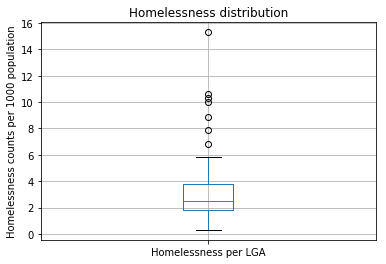

count    79.000000
mean      3.308861
std       2.525267
min       0.300000
25%       1.800000
50%       2.500000
75%       3.800000
max      15.300000
Name: homeless_count, dtype: float64
0.444444444444


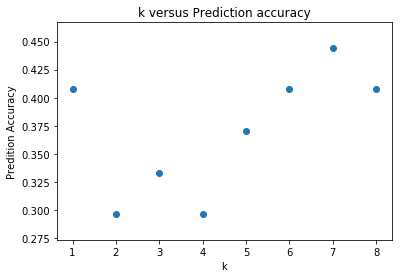

0.481481481481


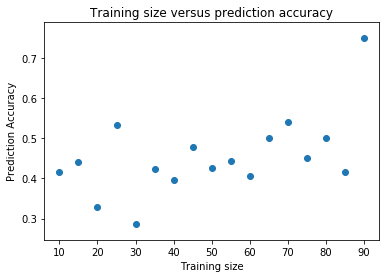

In [4]:
# KNN means
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

#features list
feature_columns = ['social_housing_count', 'drug_offences', 'rental_housing',
                    'born_overseas', 'unemployment_rate', 'year_12_Education', 'support', 'Population_2015']
# grab features
feature_data = df1[feature_columns]

#class label for testing
class_label = df1['homeless_count']

def create_boxplot(dataframe, column):
    """
    Outputs boxplot of homelessness
    
    Args:
        dataframe: dataframe which we are interested in
        column: which column to create plot for
    Returns:
        None
    """
    data = {'Homelessness per LGA': dataframe[column]}
    
    df = pd.DataFrame(data=data)
    
    df.boxplot(column = 'Homelessness per LGA')
    
    plt.show()
    
    return

# boxplot of homeless distribution
plt.title('Homelessness distribution')
plt.ylabel('Homelessness counts per 1000 population')    
create_boxplot(df1, 'homeless_count')

# information concerning boxplot, such as median and mean
print(class_label.describe())

# Chose these threshholds
threshold1 = 2.1
threshold2 = 3.5

def create_label_map(class_label, threshold1, threshold2):
    """
    Maps values of homeless count to a class label
    
    Args:
        class_label: A pandas series
    Returns:
        mapped label data
    """
    labels = [i for i in class_label]
    for i, e in enumerate(class_label):
        if e <= threshold1:
            labels[i] = 1
        if threshold1 < e <= threshold2:
            labels[i] = 2
        if e > threshold2:
            labels[i] = 3
    return labels

#CODE FROM HERE:
# Taken from workshop 8, and slightly modified to suit my task

# Create new class_label
class_label = pd.Series(create_label_map(class_label, threshold1, threshold2))

# select 66% of instances to be training data, and the rest 33% will be testing data
X_train, X_test, y_train, y_test = train_test_split(feature_data, class_label, train_size=0.66, random_state=42)

# normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
# computation of distances between instances
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# looking at knn with k = 7
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# predictions for each instance,using the class label. Comparison between prediction and actual class label
y_pred=knn.predict(X_test)

# overall accuracy
print(accuracy_score(y_test, y_pred))

# possible ranges of k
ks = range(1, len(feature_columns)+1)

# plotting optimal k values
def optimal_k(ks, X_train, y_train, X_test, y_test):
    """
    Finds optimal k values.
    Code taken from Workshop 8 solutions
    
    Args:
        ks: possible k values
        X_train: x training data
        y_train: y training data
        X_test: x testing data
        y_test: y testing data
    Returns:
        list of accuracies
    """
    accuracies = []
    for k in ks:
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train) 
        y_pred = knn.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

accuracies = optimal_k(ks, X_train, y_train, X_test, y_test)

# k versus prediction accuracy
plt.scatter(ks, accuracies)
plt.title('k versus Prediction accuracy')
plt.xlabel('k')
plt.ylabel('Predition Accuracy')
plt.show()

# decision tree
dt = DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=3)
dt.fit(X_train, y_train)

# Another prediction, for each of the test instances, a prediction for a class label is made.Compare this between the real
# class label.
y_pred=dt.predict(X_test)

# overall accuracy
print(accuracy_score(y_test, y_pred))

# decision tree classification accuracy as the size of training set, which is varied between 10% and 90%
# demonstrates which training size is most accurate
splits = range(10,95,5)

def optimal_training_size(feature_data, class_label):
    """
    returns list of training sizes against prediction accuracies
    Code taken from Workshop 8 solutions
    
    Args:
        feature_data: the relevent features to be compared with
        class_label: the label of the data
    Returns 
        list of training sizes
    """
    accuracies=[]
    for split in splits:
        X_train, X_test, y_train, y_test = train_test_split(feature_data, class_label, train_size=split/100, random_state=42)
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train=scaler.transform(X_train)
        X_test=scaler.transform(X_test)
        dt.fit(X_train, y_train)
        y_pred=dt.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies
    
# scatter plot of training sizes
accuracies = optimal_training_size(feature_data, class_label)
plt.scatter(splits, accuracies)
plt.title('Training size versus prediction accuracy')
plt.xlabel('Training size')
plt.ylabel('Prediction Accuracy')
plt.show()

   